In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris_images= load_iris()
dir(iris_images)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris_images.data.shape

(150, 4)

In [5]:
iris_images.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [6]:
iris_images.target[0]

0

In [7]:
iris_images.target_names[0]

'setosa'

In [8]:
iris_images.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(iris_images.data,iris_images.target, test_size=0.3)


In [22]:
from sklearn.linear_model import LogisticRegression

reg= LogisticRegression()

In [23]:
reg.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_test

array([2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2,
       1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1,
       0])

In [25]:
reg.predict(X_test)

array([2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2,
       1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1,
       0])

In [26]:
reg.score(X_test,y_test)

0.9555555555555556

In [27]:
from sklearn.metrics import classification_report

In [28]:
from sklearn.metrics import confusion_matrix
y_predict= reg.predict(X_test)
cm= confusion_matrix(y_test,y_predict)
cm

array([[12,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 12]])

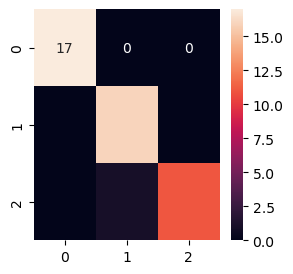

In [14]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot= True)
plt.xlabel= "Truth"
plt.ylabel= "Predicted"

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = dt_model.predict(X_test)

In [20]:
dt_model.score(X_test,y_test)

0.9555555555555556

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = dt_model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[17,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 10]])

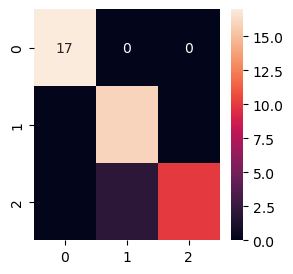

In [22]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot= True)
plt.xlabel= "Truth"
plt.ylabel= "Predicted"

In [23]:
import tensorflow as tf

In [24]:
# Define neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.11/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (5, 1) and (5, 3) are incompatible


In [29]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Define neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
24/24 [==============================] - 0s 635us/step - loss: 3.4845 - accuracy: 0.3333
Epoch 2/100
24/24 [==============================] - 0s 552us/step - loss: 2.5457 - accuracy: 0.3417
Epoch 3/100
24/24 [==============================] - 0s 523us/step - loss: 1.9486 - accuracy: 0.6250
Epoch 4/100
24/24 [==============================] - 0s 531us/step - loss: 1.5720 - accuracy: 0.6583
Epoch 5/100
24/24 [==============================] - 0s 495us/step - loss: 1.2730 - accuracy: 0.6583
Epoch 6/100
24/24 [==============================] - 0s 503us/step - loss: 1.0162 - accuracy: 0.6583
Epoch 7/100
24/24 [==============================] - 0s 484us/step - loss: 0.8120 - accuracy: 0.6583
Epoch 8/100
24/24 [==============================] - 0s 493us/step - loss: 0.6783 - accuracy: 0.6583
Epoch 9/100
24/24 [==============================] - 0s 508us/step - loss: 0.6183 - accuracy: 0.6583
Epoch 10/100
24/24 [==============================] - 0s 509us/step - loss: 0.5958 - accura

1/1 [==============================] - 0s 17ms/step


TypeError: 'str' object is not callable

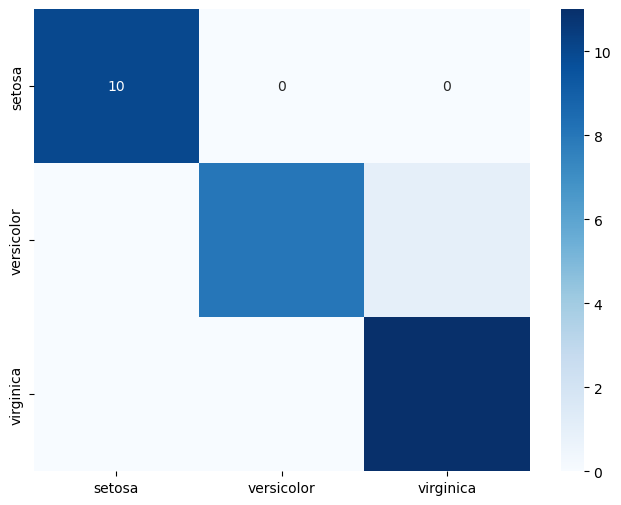

In [31]:
import seaborn as sns

# Get predictions from the model
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])